# Zakat Calulation

The purpose of this notebook is to calculate the amount of zakat that is due for each individual year. The price calculation is done in PKR.


In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [216]:
TOTAL_TOLA = 16
TOLA = 12 # 1 Tola = 12 grams
ZAKAT = 0.025 # 2.5% of total gold

In [185]:
# data path
raw_data_file = 'data/raw.csv'

In [186]:
# load data
df = pd.read_csv(raw_data_file)

# show data
df.head()

,Date,10 gram price,Tola
0,5-Feb-13,53700,NaN
1,17-April-13,46200,NaN
2,08-Jun-13,46457,NaN
3,20-Sep-13,46971,NaN
4,24-Sep-13,45600,NaN


In [187]:
# drop Tola column as it will be calculated
df.drop('Tola', axis=1, inplace=True)

# show data
df.head()

,Date,10 gram price
0,5-Feb-13,53700
1,17-April-13,46200
2,08-Jun-13,46457
3,20-Sep-13,46971
4,24-Sep-13,45600


In [188]:
# check data type
df.dtypes

Date             object
10 gram price    object
dtype: object

In [189]:
# convert 10 gram price data type to float
df['10 gram price'] = df['10 gram price'].str.replace(',', '').astype(float)

# convert date data type to date format without time
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

# check data type
df.dtypes

Date             datetime64[ns]
10 gram price           float64
dtype: object

In [190]:
# show data
df.head()

,Date,10 gram price
0,2013-02-05,53700.0
1,2013-04-17,46200.0
2,2013-06-08,46457.0
3,2013-09-20,46971.0
4,2013-09-24,45600.0


In [191]:
# describe data
df.describe()

,Date,10 gram price
count,160,1.600000e+02
mean,2019-11-18 20:15:00,5.991456e+08
min,2013-02-05 00:00:00,1.604930e+02
25%,2019-05-15 12:00:00,6.048500e+04
50%,2019-09-12 00:00:00,7.533500e+04
75%,2021-04-05 00:00:00,9.775825e+04
max,2023-08-05 00:00:00,9.585011e+10
std,NaN,7.577610e+09


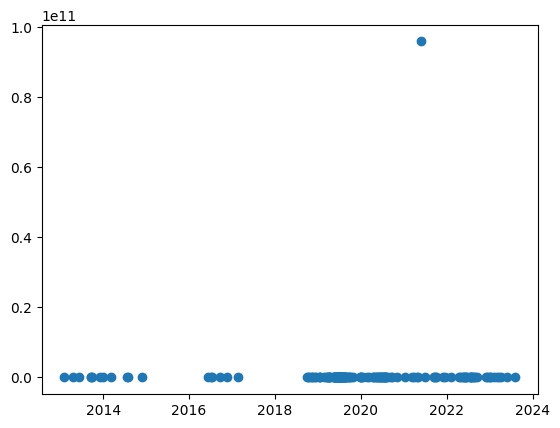

In [192]:
# scatter plot of 10 gram price
plt.scatter(df['Date'], df['10 gram price'])

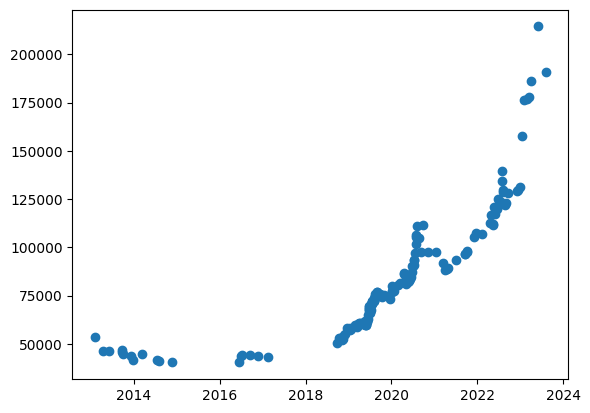

In [193]:
# remove the max value
df = df[df['10 gram price'] != df['10 gram price'].max()]

# remove the min value
df = df[df['10 gram price'] != df['10 gram price'].min()]

# scatter plot of 10 gram price
plt.scatter(df['Date'], df['10 gram price'])

<Axes: ylabel='Frequency'>

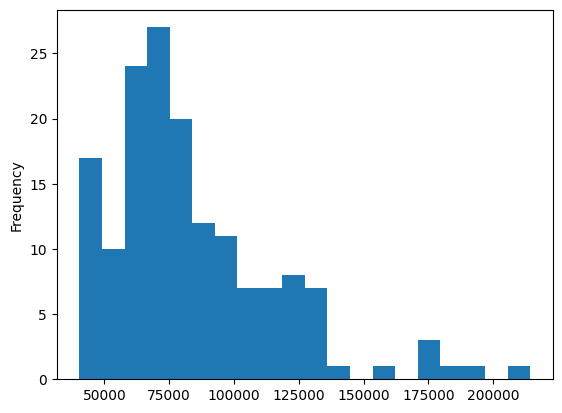

In [194]:
# plot and verify the distribution
df['10 gram price'].plot(kind='hist', bins=20)



In [195]:
# add 1 gram price column
df['1 gram price'] = df['10 gram price'] / 10

# add 1 tola price column
df['1 tola price'] = df['1 gram price'] * TOLA

# show data
df.head()

,Date,10 gram price,1 gram price,1 tola price
0,2013-02-05,53700.0,5370.0,64440.0
1,2013-04-17,46200.0,4620.0,55440.0
2,2013-06-08,46457.0,4645.7,55748.4
3,2013-09-20,46971.0,4697.1,56365.2
4,2013-09-24,45600.0,4560.0,54720.0


array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

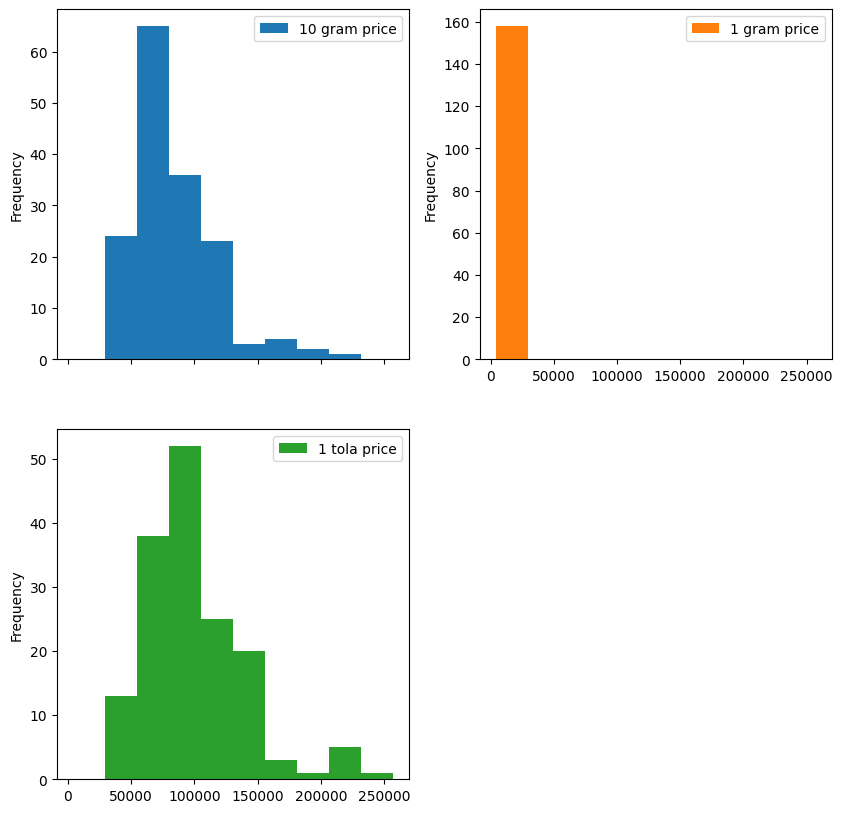

In [196]:
# plot distribution of each column
df.plot(kind='hist', subplots=True, layout=(2, 2), figsize=(10, 10))

In [197]:
# describe data
df.describe()

,Date,10 gram price,1 gram price,1 tola price
count,158,158.000000,158.000000,158.000000
mean,2019-11-08 02:34:56.202531584,83479.335443,8347.933544,100175.202532
min,2013-02-05 00:00:00,40380.000000,4038.000000,48456.000000
25%,2019-05-14 12:00:00,60517.250000,6051.725000,72620.700000
50%,2019-09-03 00:00:00,75335.000000,7533.500000,90402.000000
75%,2021-02-24 06:00:00,97680.250000,9768.025000,117216.300000
max,2023-08-05 00:00:00,214373.000000,21437.300000,257247.600000
std,NaN,32530.511277,3253.051128,39036.613533


<Axes: xlabel='Date'>

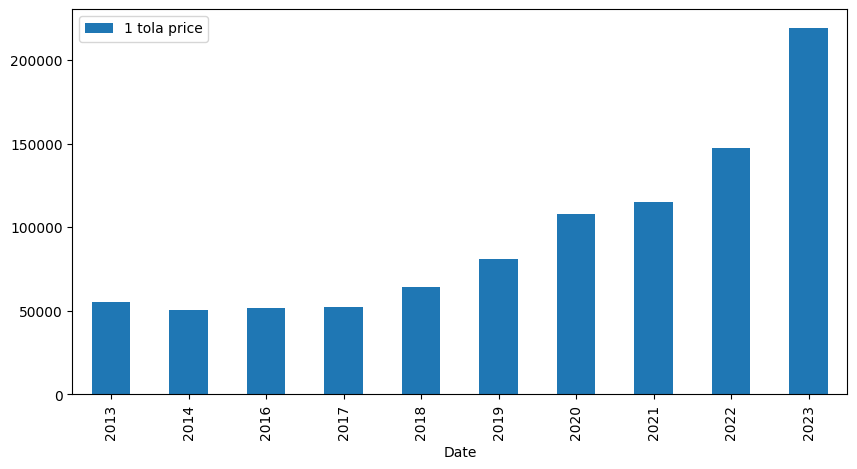

In [212]:
# caclulate the mean tola price for each year and save it in a new dataframe
year_df = df.groupby(df['Date'].dt.year)['1 tola price'].mean().to_frame()

# plot the mean tola price for each year
year_df.plot(kind='bar', figsize=(10, 5))

In [214]:
# add column for total tola price
year_df['Total tola price'] = year_df['1 tola price'] * TOTAL_TOLA

# show data
year_df

,1 tola price,Total tola price
Date,,
2013,55368.300000,8.858928e+05
2014,50427.900000,8.068464e+05
2016,51790.080000,8.286413e+05
2017,52148.400000,8.343744e+05
2018,64371.000000,1.029936e+06
2019,80844.600000,1.293514e+06
2020,107918.516129,1.726696e+06
2021,115012.200000,1.840195e+06
2022,147482.181818,2.359715e+06


In [219]:
# add column for zakat
year_df['Zakat'] = year_df['Total tola price'] * ZAKAT

#  ciel all values
year_df = year_df.apply(np.ceil)

# show data
year_df

,1 tola price,Total tola price,Zakat
Date,,,
2013,55369.0,885893.0,22148.0
2014,50428.0,806847.0,20172.0
2016,51791.0,828642.0,20717.0
2017,52149.0,834375.0,20860.0
2018,64371.0,1029936.0,25749.0
2019,80845.0,1293514.0,32338.0
2020,107919.0,1726697.0,43168.0
2021,115013.0,1840196.0,46005.0
2022,147483.0,2359715.0,58993.0


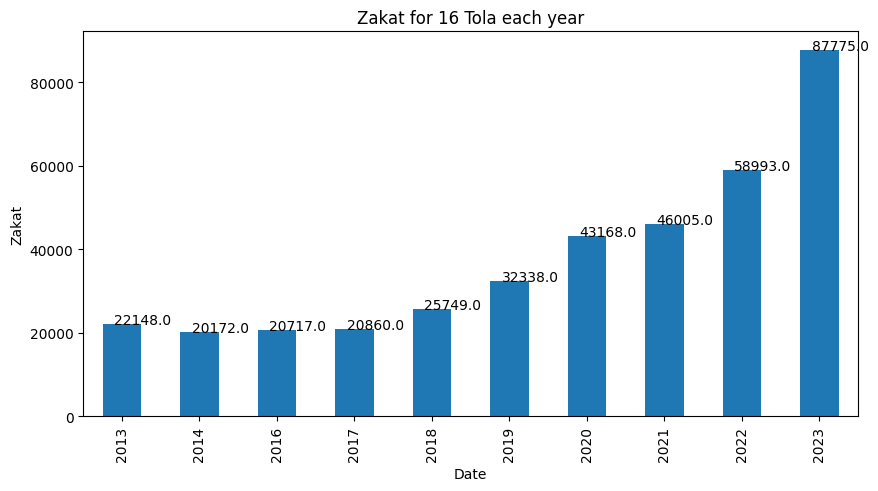

In [239]:
# plot the zakat for each year in a bar chart such that value is visible on top of each bar
# set label for x and y axis and title
plt.xlabel('Year')
plt.ylabel('Zakat')
plt.title('Zakat for 16 Tola each year')

# plot the bar chart
year_df['Zakat'].plot(kind='bar', figsize=(10, 5))
for i, v in enumerate(year_df['Zakat']):
    plt.text(i - 0.1, v + 0.5, str(v))



In [241]:
# save the data
year_df.to_csv('output/zakat.csv')

# get sum of zakat
year_df['Zakat'].sum()

377925.0